In [31]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pickle

In [27]:
N = 20

def cat_factory(n, alpha=1):
    cat_n = dq.coherent(N, alpha)
    for i in range(1,n):
        cat_n += dq.coherent(N, np.exp(1j*2*i*np.pi/n)*alpha)
    
    return cat_n / cat_n.norm()

def cat_dm_factory(n, alpha=1):
    return cat_factory(n, alpha=alpha).todm()

def plot_wigner(xvals, yvals, wigner_values):
    plt.contourf(xvals, yvals, wigner_values.T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

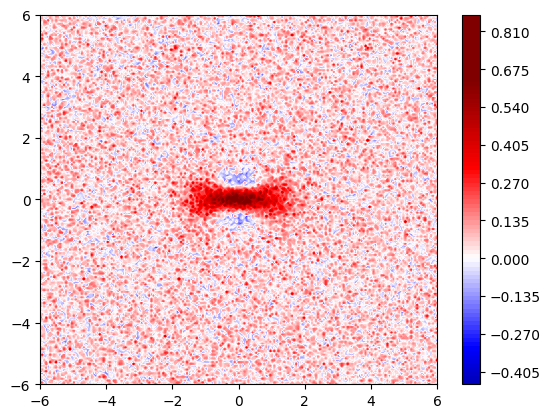

In [ ]:
state = cat_factory(2)
xvec, yvec, wigner = dq.wigner(state)

a = 1
b = 0.01
sigma = 0.1
noise = np.random.normal(0.0, scale=sigma, size=wigner.shape)

wigner_noisy = a*wigner + b*np.ones_like(wigner) + noise

plot_wigner(xvec, yvec, wigner_noisy)




